## Conectando com banco de dados no drive, e definindo valores usados em todos os treinamentos

In [ ]:
# Origin data was loaded by my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Data

/content/drive/.shortcut-targets-by-id/1mLTwt2UmXLcT2e36MSWgGAcYLIK_Nhbv/Data


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 32
img_height = 180
img_width = 200

In [1]:
class_names = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4','5', '6', '7', '8', '9']

## Raw images

In [ ]:
def plots(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Acurácia de treinamento')
  plt.plot(epochs_range, val_acc, label='Acurácia de validação')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.legend(loc='lower right')
  plt.title('Treinamento e validação de Acurácia')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Loss de treinamento')
  plt.plot(epochs_range, val_loss, label='Loss de validação')
  plt.xlabel('Épocas')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.title('Treinamento e validação de Loss')
  plt.show()

In [ ]:
def calc(model, data):

  predicted = np.argmax(model.predict(data), axis=-1)
  actual = tf.concat([y for x, y in data], axis=0)

  TP = tf.math.count_nonzero(predicted * actual)
  TN = tf.math.count_nonzero((predicted - 1) * (actual - 1))
  FP = tf.math.count_nonzero(predicted * (actual - 1))
  FN = tf.math.count_nonzero((predicted - 1) * actual)

  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  f1 = 2 * precision * recall / (precision + recall)

  print('Precision: {}'.format(precision))
  print('Recall: {}'.format(recall))
  print('F1: {}'.format(f1))

In [ ]:
data_dir = './new'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 3600 files belonging to 20 classes.
Using 2880 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 3600 files belonging to 20 classes.
Using 720 files for validation.


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.RandomFlip("vertical", input_shape=(img_height, img_width, 3)),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.Rescaling(1./255), #normalization layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 200, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 200, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 200, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 100, 32)      0         
 )                                                      

In [ ]:
import time
start_time = time.time()

epochs=300
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time = time.time() - start_time

Epoch 1/300
90/90 [==============================] - 1660s 17s/step - loss: 3.0016 - accuracy: 0.0392 - val_loss: 2.9963 - val_accuracy: 0.0458
Epoch 2/300
90/90 [==============================] - 7s 69ms/step - loss: 2.9961 - accuracy: 0.0451 - val_loss: 2.9959 - val_accuracy: 0.0694
Epoch 3/300
90/90 [==============================] - 6s 69ms/step - loss: 2.9947 - accuracy: 0.0646 - val_loss: 2.9726 - val_accuracy: 0.0778
Epoch 4/300
90/90 [==============================] - 7s 69ms/step - loss: 2.9445 - accuracy: 0.0917 - val_loss: 2.8551 - val_accuracy: 0.1181
Epoch 5/300
90/90 [==============================] - 6s 69ms/step - loss: 2.8433 - accuracy: 0.1111 - val_loss: 2.7059 - val_accuracy: 0.1625
Epoch 6/300
90/90 [==============================] - 7s 69ms/step - loss: 2.7188 - accuracy: 0.1403 - val_loss: 2.5078 - val_accuracy: 0.1681
Epoch 7/300
90/90 [==============================] - 6s 68ms/step - loss: 2.5690 - accuracy: 0.1750 - val_loss: 2.3806 - val_accuracy: 0.2028
Epoc

In [ ]:
print(time / 60)

70.27207270463308


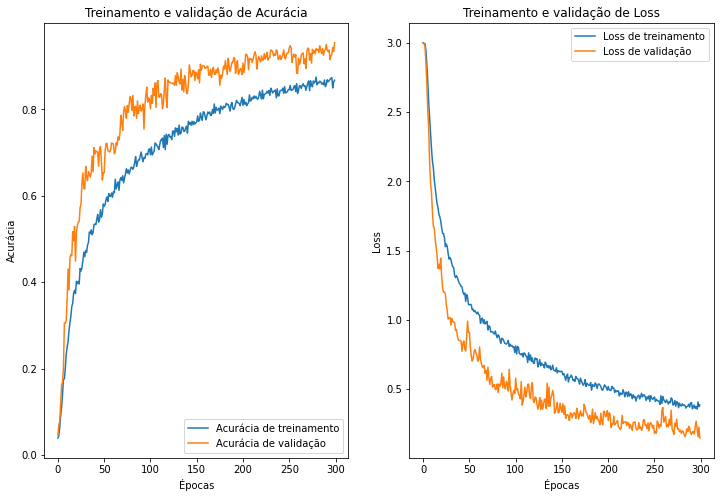

In [ ]:
plots(history)

In [ ]:
calc(model, val_ds)

Precision: 0.5015384615384615
Recall: 0.5003837298541827
F1: 0.5009604302727622


In [ ]:
!mkdir -p models
model.save('models/raw_model.h5')

## Canny

In [ ]:
data_dir = './canny'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 2880 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 720 files for validation.


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.RandomFlip("vertical", input_shape=(img_height, img_width, 1)),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.Rescaling(1./255), #normalization layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import time
start_time = time.time()

epochs=300
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time = time.time() - start_time

Epoch 1/300
90/90 [==============================] - 1819s 19s/step - loss: 2.9895 - accuracy: 0.0653 - val_loss: 2.9343 - val_accuracy: 0.0625
Epoch 2/300
90/90 [==============================] - 5s 52ms/step - loss: 2.9056 - accuracy: 0.0903 - val_loss: 2.7961 - val_accuracy: 0.1361
Epoch 3/300
90/90 [==============================] - 5s 53ms/step - loss: 2.7882 - accuracy: 0.1247 - val_loss: 2.5678 - val_accuracy: 0.1736
Epoch 4/300
90/90 [==============================] - 5s 51ms/step - loss: 2.7118 - accuracy: 0.1510 - val_loss: 2.5253 - val_accuracy: 0.1861
Epoch 5/300
90/90 [==============================] - 5s 51ms/step - loss: 2.5833 - accuracy: 0.1674 - val_loss: 2.3311 - val_accuracy: 0.2194
Epoch 6/300
90/90 [==============================] - 5s 51ms/step - loss: 2.5064 - accuracy: 0.1882 - val_loss: 2.2003 - val_accuracy: 0.2750
Epoch 7/300
90/90 [==============================] - 5s 51ms/step - loss: 2.3911 - accuracy: 0.2285 - val_loss: 2.2056 - val_accuracy: 0.2958
Epoc

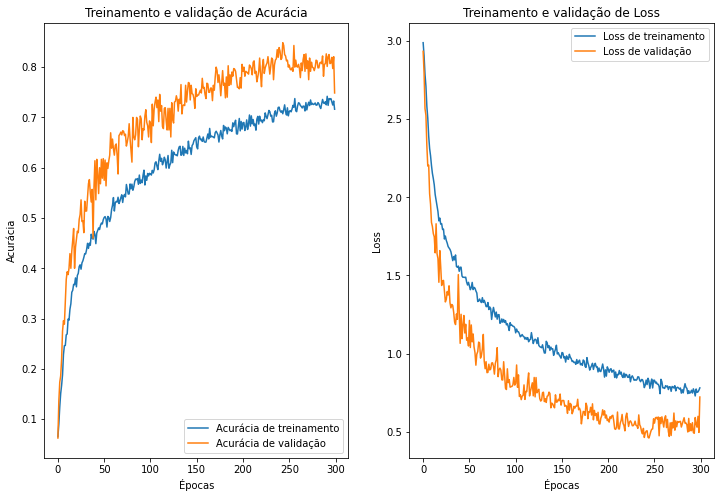

In [ ]:
plots(history)

In [ ]:
calc(model, val_ds)

Precision: 0.5011600928074246
Recall: 0.506645817044566
F1: 0.5038880248833594


In [ ]:
!mkdir -p models
model.save('models/canny_model.h5')

## Saliency map

In [ ]:
data_dir = './saliency'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 2880 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 720 files for validation.


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.RandomFlip("vertical", input_shape=(img_height, img_width, 1)),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.Rescaling(1./255), #normalization layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import time
start_time = time.time()

epochs=300
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time = time.time() - start_time

Epoch 1/300
90/90 [==============================] - 1810s 19s/step - loss: 2.9995 - accuracy: 0.0493 - val_loss: 2.9963 - val_accuracy: 0.0361
Epoch 2/300
90/90 [==============================] - 5s 53ms/step - loss: 2.9966 - accuracy: 0.0448 - val_loss: 2.9967 - val_accuracy: 0.0333
Epoch 3/300
90/90 [==============================] - 5s 54ms/step - loss: 2.9966 - accuracy: 0.0521 - val_loss: 2.9966 - val_accuracy: 0.0375
Epoch 4/300
90/90 [==============================] - 5s 58ms/step - loss: 2.9968 - accuracy: 0.0552 - val_loss: 2.9978 - val_accuracy: 0.0361
Epoch 5/300
90/90 [==============================] - 5s 54ms/step - loss: 2.9844 - accuracy: 0.0712 - val_loss: 2.9799 - val_accuracy: 0.0708
Epoch 6/300
90/90 [==============================] - 5s 54ms/step - loss: 2.9472 - accuracy: 0.0854 - val_loss: 2.8727 - val_accuracy: 0.1181
Epoch 7/300
90/90 [==============================] - 5s 55ms/step - loss: 2.8853 - accuracy: 0.0976 - val_loss: 2.8040 - val_accuracy: 0.1347
Epoc

In [ ]:
print(time / 60)

67.76781109174092


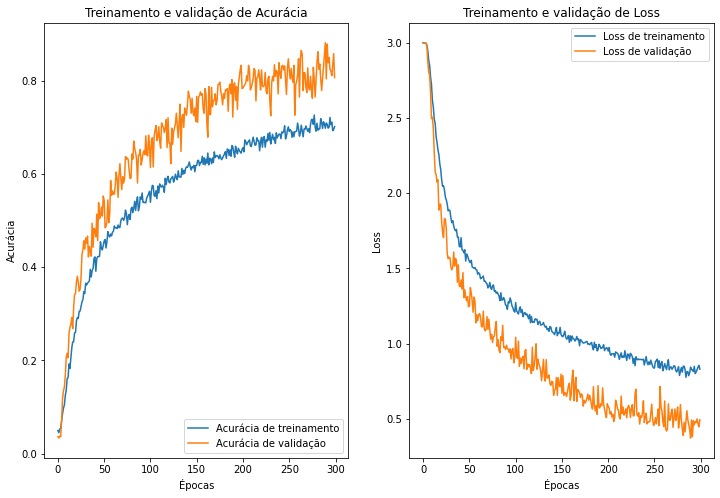

In [ ]:
plots(history)

In [ ]:
calc(model, val_ds)

Precision: 0.5007645259938838
Recall: 0.5054012345679012
F1: 0.5030721966205838


In [ ]:
!mkdir -p models
model.save('models/saliency.h5')

## Sobel

In [ ]:
data_dir = './sobel'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 2880 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 720 files for validation.


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.RandomFlip("vertical", input_shape=(img_height, img_width, 1)),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.Rescaling(1./255), #normalization layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import time
start_time = time.time()

epochs=300
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time = time.time() - start_time

Epoch 1/300
90/90 [==============================] - 1793s 18s/step - loss: 2.9967 - accuracy: 0.0517 - val_loss: 2.9767 - val_accuracy: 0.0667
Epoch 2/300
90/90 [==============================] - 5s 56ms/step - loss: 2.9423 - accuracy: 0.0924 - val_loss: 2.8352 - val_accuracy: 0.1319
Epoch 3/300
90/90 [==============================] - 5s 55ms/step - loss: 2.8173 - accuracy: 0.1212 - val_loss: 2.6186 - val_accuracy: 0.1917
Epoch 4/300
90/90 [==============================] - 5s 54ms/step - loss: 2.6817 - accuracy: 0.1507 - val_loss: 2.4177 - val_accuracy: 0.2278
Epoch 5/300
90/90 [==============================] - 5s 54ms/step - loss: 2.5709 - accuracy: 0.1799 - val_loss: 2.3826 - val_accuracy: 0.2569
Epoch 6/300
90/90 [==============================] - 5s 54ms/step - loss: 2.4971 - accuracy: 0.2010 - val_loss: 2.2312 - val_accuracy: 0.2639
Epoch 7/300
90/90 [==============================] - 5s 55ms/step - loss: 2.4326 - accuracy: 0.2031 - val_loss: 2.1592 - val_accuracy: 0.2625
Epoc

In [ ]:
print(time / 60)

68.18989143371581


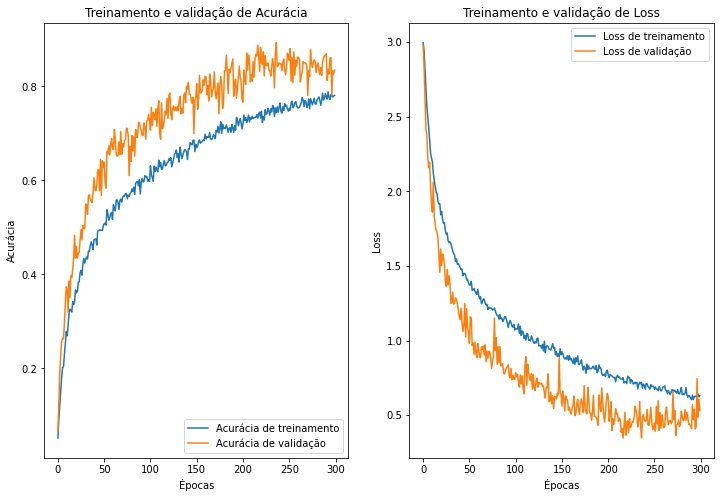

In [ ]:
plots(history)

In [ ]:
calc(model, val_ds)

Precision: 0.5015290519877675
Recall: 0.49961919268849964
F1: 0.5005723006486074


In [ ]:
!mkdir -p models
model.save('models/sobel.h5')

## Gray

In [ ]:
data_dir = './gray'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 2880 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 720 files for validation.


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.RandomFlip("vertical", input_shape=(img_height, img_width, 1)),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.Rescaling(1./255), #normalization layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import time
start_time = time.time()

epochs=300
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time = time.time() - start_time

Epoch 1/300
90/90 [==============================] - 9s 56ms/step - loss: 2.9997 - accuracy: 0.0517 - val_loss: 2.9958 - val_accuracy: 0.0500
Epoch 2/300
90/90 [==============================] - 6s 57ms/step - loss: 2.9960 - accuracy: 0.0531 - val_loss: 2.9902 - val_accuracy: 0.0625
Epoch 3/300
90/90 [==============================] - 5s 55ms/step - loss: 2.9801 - accuracy: 0.0615 - val_loss: 2.9025 - val_accuracy: 0.0708
Epoch 4/300
90/90 [==============================] - 5s 55ms/step - loss: 2.9022 - accuracy: 0.0865 - val_loss: 2.7938 - val_accuracy: 0.1125
Epoch 5/300
90/90 [==============================] - 5s 55ms/step - loss: 2.8010 - accuracy: 0.1177 - val_loss: 2.6218 - val_accuracy: 0.1708
Epoch 6/300
90/90 [==============================] - 5s 54ms/step - loss: 2.7130 - accuracy: 0.1281 - val_loss: 2.4879 - val_accuracy: 0.1833
Epoch 7/300
90/90 [==============================] - 5s 55ms/step - loss: 2.5996 - accuracy: 0.1538 - val_loss: 2.4096 - val_accuracy: 0.1806
Epoch 

In [ ]:
print(time / 60)

38.251915860176084


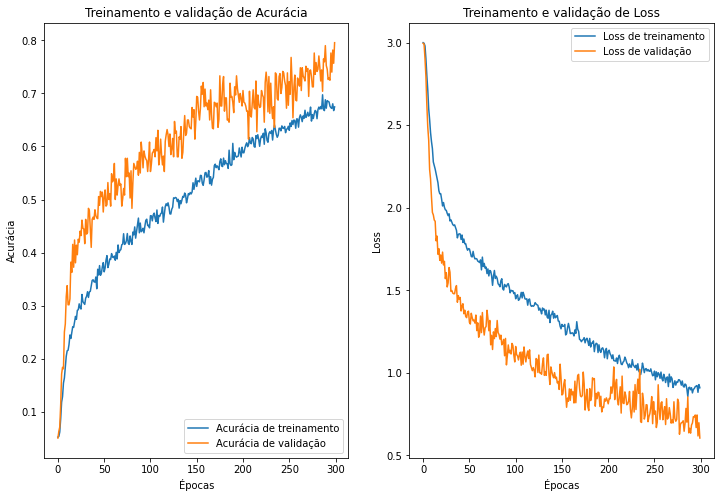

In [ ]:
plots(history)

In [ ]:
calc(model, val_ds)

In [ ]:
!mkdir -p models
model.save('models/gray.h5')

## Sobel + OTSU

In [ ]:
data_dir = './sobelOtsu'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 2880 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 720 files for validation.


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.RandomFlip("vertical", input_shape=(img_height, img_width, 1)),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.Rescaling(1./255), #normalization layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import time
start_time = time.time()

epochs=300
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time = time.time() - start_time

Epoch 1/300
90/90 [==============================] - 547s 6s/step - loss: 2.9875 - accuracy: 0.0642 - val_loss: 2.9241 - val_accuracy: 0.0958
Epoch 2/300
90/90 [==============================] - 5s 57ms/step - loss: 2.9186 - accuracy: 0.0885 - val_loss: 2.7645 - val_accuracy: 0.0958
Epoch 3/300
90/90 [==============================] - 6s 67ms/step - loss: 2.7943 - accuracy: 0.1250 - val_loss: 2.6837 - val_accuracy: 0.1556
Epoch 4/300
90/90 [==============================] - 5s 54ms/step - loss: 2.6822 - accuracy: 0.1569 - val_loss: 2.5067 - val_accuracy: 0.1917
Epoch 5/300
90/90 [==============================] - 5s 54ms/step - loss: 2.5512 - accuracy: 0.1955 - val_loss: 2.3642 - val_accuracy: 0.2639
Epoch 6/300
90/90 [==============================] - 5s 55ms/step - loss: 2.4287 - accuracy: 0.2184 - val_loss: 2.1950 - val_accuracy: 0.3028
Epoch 7/300
90/90 [==============================] - 7s 71ms/step - loss: 2.2591 - accuracy: 0.2639 - val_loss: 2.0408 - val_accuracy: 0.3264
Epoch 

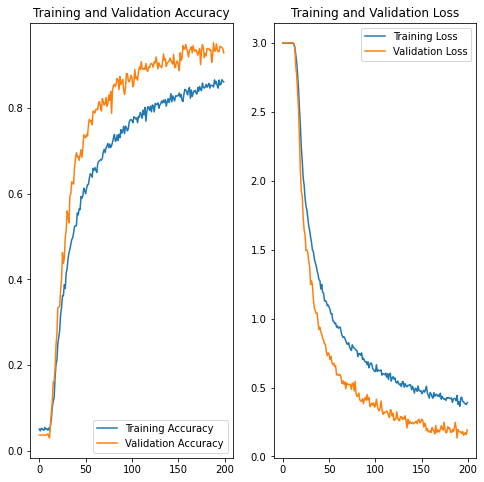

In [ ]:
plots(history)

In [ ]:
print(time / 60)

49.231249745686846


In [ ]:
calc(model, val_ds)

Precision: 0.5011636927851048
Recall: 0.5023328149300156
F1: 0.501747572815534


In [ ]:
!mkdir -p models
model.save('models/sobelOTSU.h5')

## Binarização adaptativa

In [ ]:
data_dir = './grayAdaptative'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 2880 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  color_mode='grayscale')

Found 3600 files belonging to 20 classes.
Using 720 files for validation.


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.RandomFlip("vertical", input_shape=(img_height, img_width, 1)),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.Rescaling(1./255), #normalization layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import time
start_time = time.time()

epochs=300
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time = time.time() - start_time

Epoch 1/300
90/90 [==============================] - 527s 5s/step - loss: 3.0175 - accuracy: 0.0479 - val_loss: 2.9993 - val_accuracy: 0.0458
Epoch 2/300
90/90 [==============================] - 6s 62ms/step - loss: 2.9961 - accuracy: 0.0490 - val_loss: 2.9909 - val_accuracy: 0.0681
Epoch 3/300
90/90 [==============================] - 6s 61ms/step - loss: 2.9655 - accuracy: 0.0816 - val_loss: 2.9573 - val_accuracy: 0.0889
Epoch 4/300
90/90 [==============================] - 6s 59ms/step - loss: 2.9156 - accuracy: 0.0910 - val_loss: 2.8585 - val_accuracy: 0.1042
Epoch 5/300
90/90 [==============================] - 5s 58ms/step - loss: 2.8532 - accuracy: 0.1014 - val_loss: 2.7809 - val_accuracy: 0.1389
Epoch 6/300
90/90 [==============================] - 5s 56ms/step - loss: 2.8014 - accuracy: 0.1024 - val_loss: 2.8167 - val_accuracy: 0.1514
Epoch 7/300
90/90 [==============================] - 5s 56ms/step - loss: 2.7559 - accuracy: 0.1132 - val_loss: 2.6924 - val_accuracy: 0.1458
Epoch 

In [ ]:
print(time / 60)

49.231249745686846


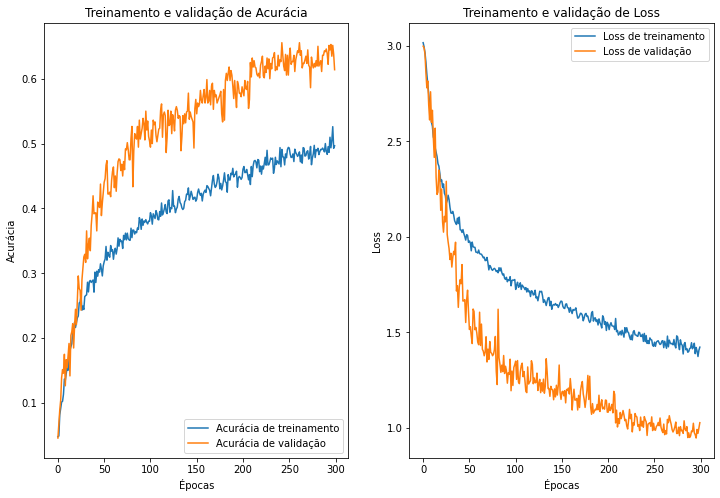

In [ ]:
plots(history)

In [ ]:
calc(model, val_ds)

In [ ]:
!mkdir -p models
model.save('models/adaptativo.h5')